In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1540751753.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1540751753.log


Finished parsing file /home/ubuntu/my-notebooks/course-2/week1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.018603 secs.

This non-commercial license of GraphLab Create for academic use is assigned to gaurav.agrawal@zs.com and will expire on October 05, 2019.
------------------------------------------------------

Read 99 lines. Lines per second: 7517.66

Finished parsing file /home/ubuntu/my-notebooks/course-2/week1/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.015398 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [3]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [4]:
graphlab.canvas.set_target('ipynb')

In [5]:
sales.show(view="Scatter Plot", x = "CrimeRate", y ="HousePrice")

In [6]:
crime_model = graphlab.linear_regression.create(sales, target = 'HousePrice', features = ['CrimeRate'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 99

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.001898     | 314982.574662      | 83468.940148  |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

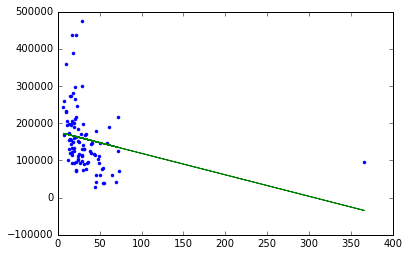

In [8]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

# Remove center city and redo

In [9]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

In [10]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target = 'HousePrice', features = ['CrimeRate'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 98

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000182     | 315335.534886      | 78052.676125  |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

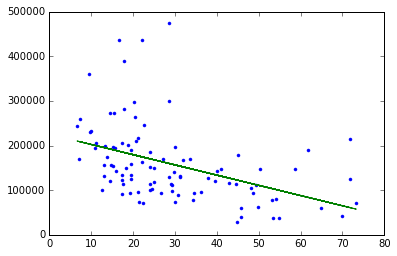

In [12]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model_noCC.predict(sales_noCC),'-')